# Sentiment Analysis - EDA, Modelling, Analysis, & Result

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
reviews_df = pd.read_csv('data/Amazon Reviews.csv')
reviews_df.head(1).transpose()

,0
id,AVqkIhwDv8e3D1O-lebb
name,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
asins,B01AHB9CN2
brand,Amazon
categories,"Electronics,iPad & Tablets,All Tablets,Fire Ta..."
keys,"841667104676,amazon/53004484,amazon/b01ahb9cn2..."
manufacturer,Amazon
reviews.date,2017-01-13T00:00:00.000Z
reviews.dateAdded,2017-07-03T23:33:15Z
reviews.dateSeen,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z"


In [3]:
reviews_df.shape

(34660, 21)

Dataset size : 34,660 rows and 21 columns

- Reviews rating < 4 is negative. Rating >=4 is positive
- The text reviews of each product will be rich enough to train a sentiment analysis classifier 

In [4]:
reviews_df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [5]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [6]:
reviews_df[['reviews.userCity', 'reviews.userProvince', 'reviews.id', 'reviews.didPurchase']]

,reviews.userCity,reviews.userProvince,reviews.id,reviews.didPurchase
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
34655,NaN,NaN,NaN,NaN
34656,NaN,NaN,NaN,NaN
34657,NaN,NaN,NaN,NaN
34658,NaN,NaN,NaN,NaN


Drop these columns because almost 100% are `NaN` values

In [7]:
reviews_df = reviews_df.drop(columns=['reviews.userCity', 'reviews.userProvince', 
                                      'reviews.id', 'reviews.didPurchase'],
                            axis=1)

In [8]:
reviews_df.isnull().sum()

id                         0
name                    6760
asins                      2
brand                      0
categories                 0
keys                       0
manufacturer               0
reviews.date              39
reviews.dateAdded      10621
reviews.dateSeen           0
reviews.doRecommend      594
reviews.numHelpful       529
reviews.rating            33
reviews.sourceURLs         0
reviews.text               1
reviews.title              5
reviews.username           2
dtype: int64

<br>


### Data Exploration

- `name` and `asins`

In [9]:
# list all 'asins' and name of the 'asins'

reviews_df.groupby('asins')['name'].unique()

asins
B002Y27P3M               [Kindle Keyboard,,,\r\nKindle Keyboard,,,, All...
B002Y27P6Y                                                           [nan]
B005PB2T0S               [Amazon Kindle Lighted Leather Cover,,,\r\nAma...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B006GWO5NE                                                           [nan]
B006GWO5WK                                                           [nan]
B0083Q04TA               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00BFJAHF8                                                           [nan]
B00DU15MU4               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00IOY8XWQ               [Kindle Voyage E-reader, 6 High-Resolution Dis...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Echo (White),,,\r\nEcho (White),,,, Echo (Whi...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM         

In [10]:
len(reviews_df.groupby('asins')['name'].unique())

41

There are actually 41 `asins` with one of the product having 2 `asins`

In [12]:
# reviews_df['name'].fillna('0', inplace=True)

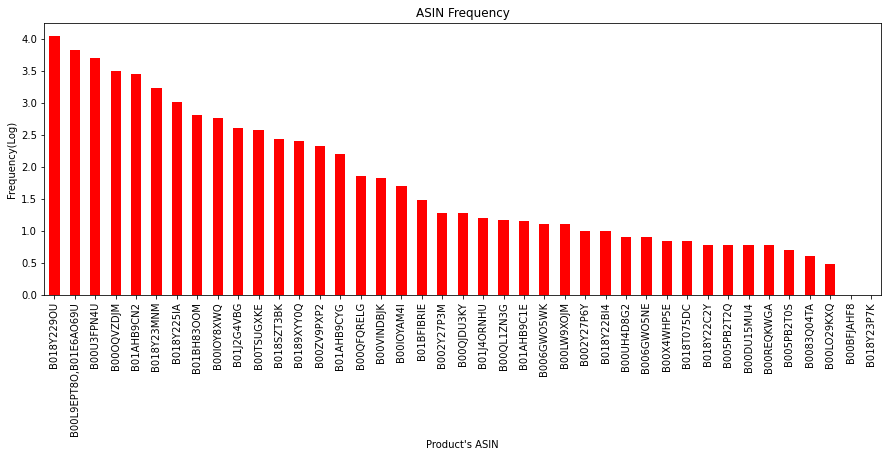

In [13]:
fig = plt.figure(figsize=(15,5))
np.log10(reviews_df["asins"].value_counts()).plot(kind="bar", 
                                                  title="ASIN Frequency", color='red') 
plt.xlabel("Product's ASIN")
plt.ylabel('Frequency(Log)')
plt.show()

Based on the exploration above:
- `asins` has a right-skewed distribution, means that certain products have significantly more reviews than other products, which may indicate a higher sale in those specific products

In [14]:
# reviews_df['reviews.rating'].isna().sum()

<br>
<br>

- `reviews.doRecommend`

<AxesSubplot:xlabel='reviews.doRecommend', ylabel='count'>

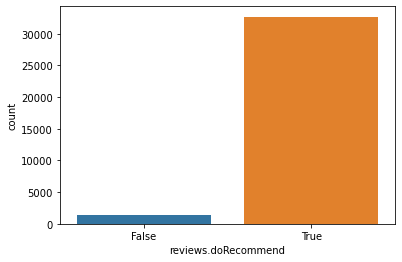

In [15]:
sns.countplot(reviews_df['reviews.doRecommend'])

In [16]:
reviews_df['reviews.doRecommend'].value_counts()

True     32682
False     1384
Name: reviews.doRecommend, dtype: int64

<br>

- `reviews.numHelpful`

In [17]:
numeric_df = reviews_df._get_numeric_data()
numeric_df.columns

Index(['reviews.numHelpful', 'reviews.rating'], dtype='object')

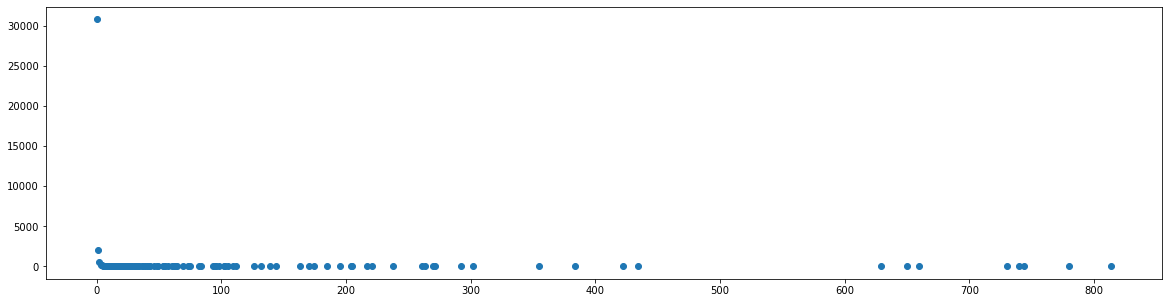

In [18]:
# visualization for reviews.numHelpful

plt.figure(figsize=(20,5))
plt.scatter(numeric_df['reviews.numHelpful'].value_counts().index,
           numeric_df['reviews.numHelpful'].value_counts().values)
plt.show()


Based on the distributions above:

- `reviews.numHelpful`: Outliers in this case are valuable, so we may want to weight reviews that had more than 50+ people who find them helpful
<br>
<br>


<br>

- `reviews.text`

In [19]:
reviews_df[reviews_df['reviews.text'].isna()]['reviews.rating']

3111    5.0
Name: reviews.rating, dtype: float64

In [20]:
reviews_df = reviews_df[reviews_df['reviews.text'].notna()]

In [21]:
# reviews_df.isna().sum()

<br>

<br>

#### Explore target columns `reviews.rating`

In [22]:
reviews_df['reviews.rating'].isna().sum()

33

In [23]:
# drop this null values from col 'reviews.rating'
reviews_df['reviews.rating'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
34655    False
34656    False
34657    False
34658    False
34659    False
Name: reviews.rating, Length: 34659, dtype: bool

In [24]:
reviews_df['reviews.rating'].mean()

4.584560734708023

In [25]:
reviews_df['reviews.rating'].median()

5.0

In [26]:
# change review.rating data type 
reviews_df['reviews.rating'] = round(reviews_df['reviews.rating'])
reviews_df['reviews.rating'].values

array([5., 5., 5., ..., 1., 1., 1.])

In [27]:
# drop the null values from column 'reviews.rating'
reviews_df = reviews_df[reviews_df['reviews.rating'].notna()]

<AxesSubplot:xlabel='reviews.rating', ylabel='count'>

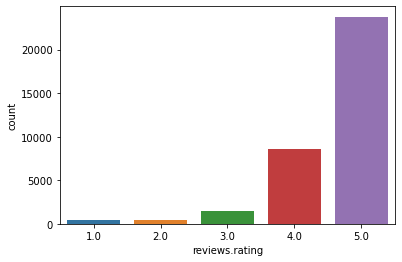

In [28]:
sns.countplot(reviews_df['reviews.rating'])

- `reviews.rating`: Majority of examples were rated highly (looking at rating distribution). There is twice amount of 5 star ratings than the others ratings combined <br>
- `reviews.rating` that are below 4 should be encoded as 0 ('not good') and `reviews.rating` with scores 4 and 5 as 1 ('good').

In [29]:
reviews_df["reviews.rating"] = reviews_df["reviews.rating"].apply(lambda x: 0 if x < 4 else 1)

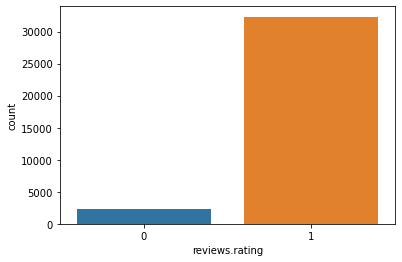

In [30]:
sns_plot = sns.countplot(reviews_df['reviews.rating'])

In [31]:
sns_plot.figure.savefig("reviews_rating.png")

In [32]:
# print("Score negative (%):" + str(round(len(reviews_df[reviews_df['reviews.rating']==-1])/len(reviews_df['reviews.rating']),3)))
print("Score negative (%):" + str(round(len(reviews_df[reviews_df['reviews.rating']==0])/len(reviews_df['reviews.rating']),3)))
print("Score positive (%):" + str(round(len(reviews_df[reviews_df['reviews.rating']==1])/len(reviews_df['reviews.rating']),3)))

Score negative (%):0.067
Score positive (%):0.933


<br>

In [35]:
df = reviews_df[['reviews.text', 'reviews.rating']]

In [36]:
# save 'reviews.text', 'reviews.rating' columns in a csv file
df.to_csv (r'data/clean_data.csv', index = False, header=True)

-----

#### Cleaning text data

In [37]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string

from nltk.corpus import stopwords 

from my_util import *

<br>
<br>

### Split into Train/Test/Validation

- Since the majority of reviews are good, we will need to do a stratified split on the `reviews score` to ensure that we don’t train the classifier on imbalanced data

In [38]:
X = reviews_df['reviews.text']
y = reviews_df['reviews.rating']

In [39]:
X_train, X_validation, X_test, X_remainder, y_train, y_validation, y_test, y_remainder, bagofwords = train_test_split(X,y)

In [40]:
X_train.shape

(36352, 10003)

In [41]:
y_train.shape

(36352,)

In [42]:
y_train.value_counts()

1    18176
0    18176
Name: reviews.rating, dtype: int64

In [43]:
# lists for accuracy scores per model
accuracy_sc=[]
modelling=[]
prec=[]
rcall=[]
f1_sc=[]

<br>
<br>

## Modelling

### Logistic Regression

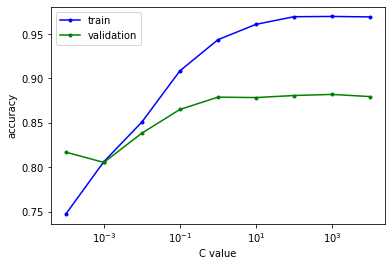

In [44]:
import warnings
warnings.filterwarnings("ignore")


# Now we have our data Vectorized (i.e. a table numerical rows/columns)
# so we can build a model on it
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

train_accs = []
test_accs = []
val_accs = []

for c in C_values:
    
    # Instantiate & fit the model
    logreg = LogisticRegression(C = c)
    logreg.fit(X_train, y_train)
    
    # Keep track of the train & test accuacies
    train_accs.append(logreg.score(X_train, y_train))
    val_accs.append(logreg.score(X_validation,y_validation))

# Visualize the train & test accuracies across c-values
plt.figure()
plt.plot(C_values, train_accs, c='blue', label='train', marker='.')
plt.plot(C_values, val_accs, c='green', label='validation', marker='.')
plt.xlabel('C value')
plt.ylabel('accuracy')
plt.xscale('log')
plt.legend()
plt.show()


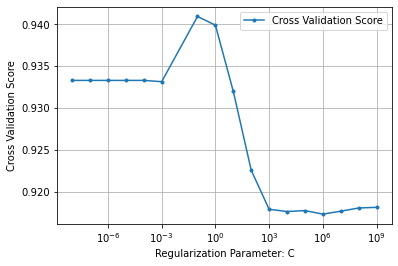

The best model has C =  0.1


In [45]:
# 10-folds cross validation

from sklearn.model_selection import cross_val_score

cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=1)
    cv_score = np.mean(cross_val_score(LR_model, X_remainder, y_remainder, cv = 10))
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ",C_range[which_max])

In [46]:
best_log_model = LogisticRegression(C=C_range[which_max])
best_log_model.fit(X_remainder,y_remainder)
print(f'Score on train: {best_log_model.score(X_remainder,y_remainder)}')
print(f'Score on test: {best_log_model.score(X_test,y_test)}')

Score on train: 0.9492471793292002
Score on test: 0.9388933810788956


In [47]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [48]:
# Confusion Matrix & Classification Report

from sklearn.metrics import confusion_matrix

y_pred = best_log_model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[ 110,  468],
       [  61, 8018]], dtype=int64)

In [49]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.64      0.19      0.29       578
           1       0.94      0.99      0.97      8079

    accuracy                           0.94      8657
   macro avg       0.79      0.59      0.63      8657
weighted avg       0.92      0.94      0.92      8657



In [50]:
accuracy_sc.append(best_log_model.score(X_test,y_test))
modelling.append('Logistic Regression')
prec.append(precision_score(y_test, y_pred))
rcall.append(recall_score(y_test, y_pred))
f1_sc.append(f1_score(y_test, y_pred))

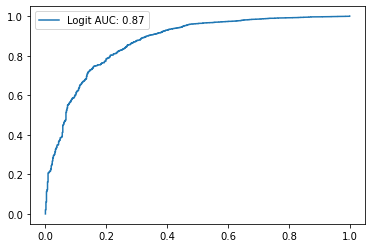

In [51]:
# ROC & AUC

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc

best_log_model = LogisticRegression(C=C_range[which_max])
best_log_model.fit(X_remainder,y_remainder)

y_pred = best_log_model.predict_proba(X_test)[:, 1]


logit_fprs_test, logit_tprs_test, thresholds_test = roc_curve(y_test, y_pred)

logit_auc_value = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(logit_fprs_test, logit_tprs_test, label=f"Logit AUC: {round(logit_auc_value,2)}")
plt.legend()
plt.show()

In [52]:
coefficients = best_log_model.coef_

In [53]:
indices = coefficients.argsort()[0]

In [54]:
# The words with the lowest coefficients 
# most predictive of a 0 (negative review)

np.array(bagofwords.get_feature_names())[indices[:20]]

array(['return', 'slow', 'ok', 'okay', 'doesnt', 'not', 'terribl', 'hope',
       'disappoint', 'wouldnt', 'freez', 'noth', 'didnt', 'pay',
       'difficult', 'decent', 'poor', 'dont', 'back', 'end'], dtype='<U87')

In [57]:
# The words with the highest coefficients
# most predictive of a 1 (positive review)
np.array(bagofwords.get_feature_names())[indices[-20:]]

array(['worri', 'best', 'room', 'highli', 'echo', 'cabl', 'prime',
       'happi', 'pleas', 'enjoy', 'well', 'fun', 'amaz', 'awesom', 'beat',
       'great', 'perfect', 'excel', 'easi', 'love'], dtype='<U87')

<br>


### K-Nearest Neighbor

In [60]:
X_train, X_validation, X_test, X_remainder, y_train, y_validation, y_test, y_remainder, bagofwords = train_test_split(X,y)

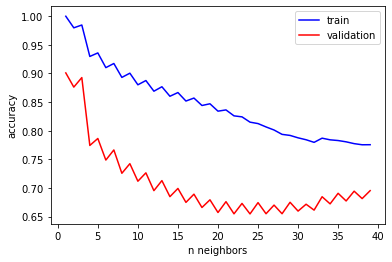

In [61]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier

k_values = np.arange(1,40,1)

train_scores = []
val_scores = []

for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    val_scores.append(knn.score(X_validation, y_validation))
    

plt.figure()
plt.plot(k_values, train_scores, c='blue', label='train')
plt.plot(k_values, val_scores, c='red', label='validation')
plt.xlabel('n neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()


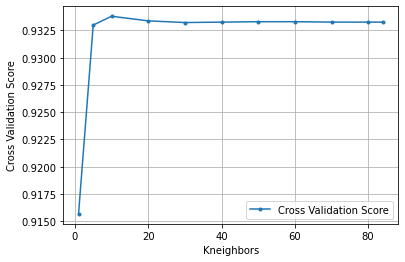

The best model has k =  10


In [62]:
K_range = [1,5,10,20,30,40,50,60,70,80,84]

cross_validation_scores = []

for i in K_range:
    my_model = KNeighborsClassifier(n_neighbors=i)
    
    scores = np.mean(cross_val_score(my_model, X_remainder, y_remainder, cv=10))
    
    cross_validation_scores.append(scores)
    
plt.figure()
plt.plot(K_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xlabel('Kneighbors')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(cross_validation_scores).argmax()

print("The best model has k = ",K_range[which_max])

In [63]:
best_knn_model = KNeighborsClassifier(n_neighbors=K_range[which_max])
best_knn_model = best_knn_model.fit(X_remainder, y_remainder)

train_score = best_knn_model.score(X_remainder,y_remainder)
test_score = best_knn_model.score(X_test, y_test)

In [64]:
print(f'Score on train: {train_score}')
print(f'Score on test: {test_score}')

Score on train: 0.9349994223882321
Score on test: 0.9326556543837357


In [65]:
accuracy_sc.append(test_score)
modelling.append('K Nearest Neighbor')

In [66]:
from sklearn.metrics import confusion_matrix

y_pred = best_knn_model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[   7,  571],
       [  12, 8067]], dtype=int64)

In [67]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.37      0.01      0.02       578
           1       0.93      1.00      0.97      8079

    accuracy                           0.93      8657
   macro avg       0.65      0.51      0.49      8657
weighted avg       0.90      0.93      0.90      8657



In [68]:
prec.append(precision_score(y_test, y_pred))
rcall.append(recall_score(y_test, y_pred))
f1_sc.append(f1_score(y_test, y_pred))

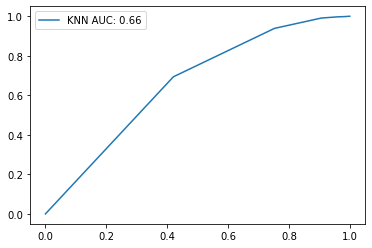

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc

best_knn_model = KNeighborsClassifier(n_neighbors=K_range[which_max])
best_knn_model = best_knn_model.fit(X_remainder, y_remainder)

y_pred = best_knn_model.predict_proba(X_test)[:, 1]


knn_fprs_test, knn_tprs_test, thresholds_test = roc_curve(y_test, y_pred)

knn_auc_value = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(knn_fprs_test, knn_tprs_test, label=f"KNN AUC: {round(knn_auc_value,2)}")
plt.legend()
plt.show()

<br>

### Decision Tree

In [70]:
X_train, X_validation, X_test, X_remainder, y_train, y_validation, y_test, y_remainder, bagofwords = train_test_split(X,y)

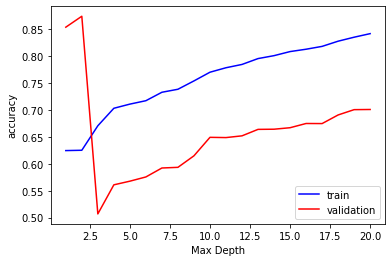

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt_test_accuracies = []
depths = []
train_scores =[]
val_scores =[]
d_values = np.arange(1,21,1)

for d in d_values:

    my_dt = DecisionTreeClassifier(max_depth=d, random_state=1)
    my_dt.fit(X_train, y_train)
    train_scores.append(my_dt.score(X_train, y_train))
    val_scores.append(my_dt.score(X_validation, y_validation))
    depths.append(d)
    
plt.figure()
plt.plot(depths, train_scores, c='blue', label='train')
plt.plot(depths, val_scores, c='red', label='validation')
plt.xlabel('Max Depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()


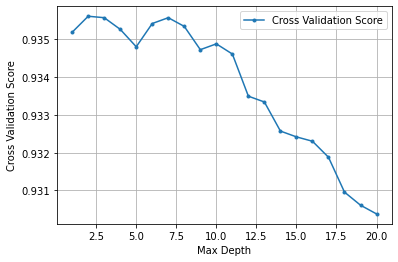

The best model has depth =  2


In [72]:
d_values = np.arange(1,21,1)

cross_validation_scores = []

for d in d_values:
    
    my_dt = DecisionTreeClassifier(max_depth=d, random_state=1)
    
    scores = np.mean(cross_val_score(my_dt, X_remainder, y_remainder, cv=10))
    
    cross_validation_scores.append(scores)
    
plt.figure()
plt.plot(d_values, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(cross_validation_scores).argmax()

print("The best model has depth = ",d_values[which_max])

In [73]:
best_dt_model = DecisionTreeClassifier(max_depth=d_values[which_max], random_state=1)
best_dt_model = best_dt_model.fit(X_remainder, y_remainder)

train_score = best_dt_model.score(X_remainder,y_remainder)
test_score = best_dt_model.score(X_test, y_test)

print(f'Score on train: {train_score}')
print(f'Score on test: {test_score}')

Score on train: 0.9359236012168355
Score on test: 0.935659004273998


In [74]:
accuracy_sc.append(test_score)
modelling.append('Decision Tree')

In [75]:
from sklearn.metrics import confusion_matrix

y_pred = best_dt_model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[  52,  526],
       [  31, 8048]], dtype=int64)

In [76]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.63      0.09      0.16       578
           1       0.94      1.00      0.97      8079

    accuracy                           0.94      8657
   macro avg       0.78      0.54      0.56      8657
weighted avg       0.92      0.94      0.91      8657



In [77]:
prec.append(precision_score(y_test, y_pred))
rcall.append(recall_score(y_test, y_pred))
f1_sc.append(f1_score(y_test, y_pred))

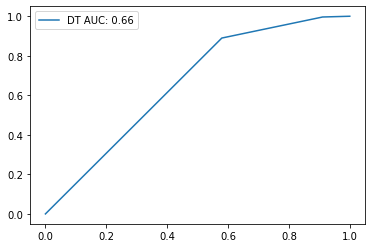

In [78]:
from sklearn.tree import DecisionTreeClassifier

best_dt_model = DecisionTreeClassifier(max_depth=d_values[which_max], random_state=1)
best_dt_model = best_dt_model.fit(X_remainder, y_remainder)

y_pred = best_dt_model.predict_proba(X_test)[:, 1]


dt_fprs_test, dt_tprs_test, thresholds_test = roc_curve(y_test, y_pred)

dt_auc_value = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(dt_fprs_test, dt_tprs_test, label=f"DT AUC: {round(dt_auc_value,2)}")
plt.legend()
plt.show()

<br>

### Random Forest

In [79]:
X_train, X_validation, X_test, X_remainder, y_train, y_validation, y_test, y_remainder, bagofwords = train_test_split(X,y)

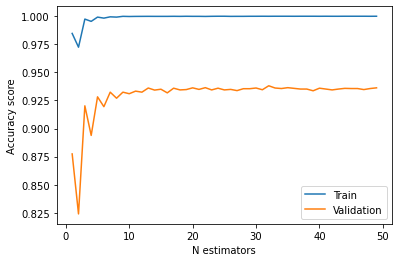

In [80]:
from sklearn.ensemble import RandomForestClassifier

train_scores = []
test_scores = []
val_scores =[]

for n in range(1,50):
    rf = RandomForestClassifier(n_estimators = n)
    rf.fit(X_train,y_train)
    
    train_scores.append(rf.score(X_train,y_train))
    val_scores.append(rf.score(X_validation, y_validation))
    
plt.figure()
plt.plot(range(1,50), train_scores, label="Train")
plt.plot(range(1,50), val_scores, label="Validation")
plt.xlabel('N estimators')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

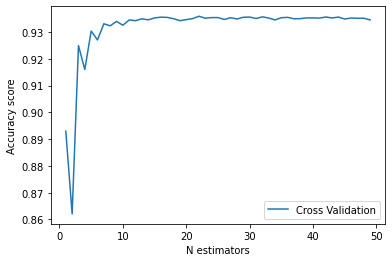

The best performance using using cross validation is: 22 estimators


In [81]:
# used 10 folds, ran for 2 hours still not finished

from sklearn.model_selection import cross_val_score

cv_scores = []

for n in range(1,50):
    rf = RandomForestClassifier(n_estimators = n)
    
    cv_score = np.mean(cross_val_score(rf,X_remainder, y_remainder, cv=5))
    cv_scores.append(cv_score)

plt.figure()
plt.plot(range(1,50), cv_scores, label="Cross Validation")
plt.xlabel('N estimators')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

n = range(1,50)[np.argmax(cv_scores)]
print(f"The best performance using using cross validation is: {n} estimators")

In [82]:
best_rf = RandomForestClassifier(n_estimators=n)
best_rf.fit(X_remainder, y_remainder)
best_rf.score(X_test,y_test)

0.9362365715605868

In [83]:
accuracy_sc.append(best_rf.score(X_test,y_test))
modelling.append('Random Forest')

In [84]:
from sklearn.metrics import confusion_matrix

y_pred = best_rf.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[  46,  532],
       [  20, 8059]], dtype=int64)

In [85]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.70      0.08      0.14       578
           1       0.94      1.00      0.97      8079

    accuracy                           0.94      8657
   macro avg       0.82      0.54      0.55      8657
weighted avg       0.92      0.94      0.91      8657



In [86]:
prec.append(precision_score(y_test, y_pred))
rcall.append(recall_score(y_test, y_pred))
f1_sc.append(f1_score(y_test, y_pred))

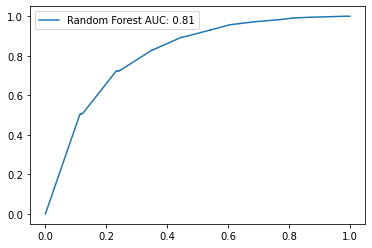

In [87]:
best_rf = RandomForestClassifier(n_estimators=n)
best_rf = best_rf.fit(X_remainder, y_remainder)
y_pred = best_rf.predict_proba(X_test)[:, 1]


rf_fprs_test, rf_tprs_test, thresholds_test = roc_curve(y_test, y_pred)

rf_auc_value = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(rf_fprs_test, rf_tprs_test, label=f"Random Forest AUC: {round(rf_auc_value,2)}")
plt.legend()
plt.show()

<br>

### Linear SVC

In [88]:
X_train, X_validation, X_test, X_remainder, y_train, y_validation, y_test, y_remainder, bagofwords = train_test_split(X,y)

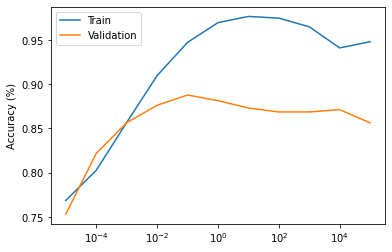

In [89]:
from sklearn.svm import LinearSVC

train_scores = []
test_scores = []
val_scores =[]
C_values = []

for i in range(-5, 6):

    linear_SVC = LinearSVC(C=10**i)

    linear_SVC.fit(X_train, y_train)
    
    C_values.append(10**i)
    train_scores.append(linear_SVC.score(X_train, y_train))
    test_scores.append(linear_SVC.score(X_test, y_test))
    val_scores.append(linear_SVC.score(X_validation, y_validation))

    
plt.figure()
plt.plot(C_values, train_scores, label="Train")
plt.plot(C_values, val_scores, label="Validation")
plt.xscale("log")
plt.legend()
plt.ylabel("Accuracy (%)")
plt.show()

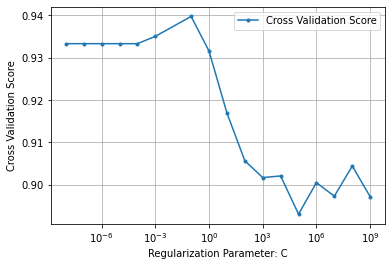

The best model has C =  0.1


In [90]:
from sklearn.model_selection import cross_val_score

cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    linear_SVC = LinearSVC(C=c)
    cv_score = np.mean(cross_val_score(linear_SVC, X_remainder, y_remainder, cv = 10))
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ",C_range[which_max])

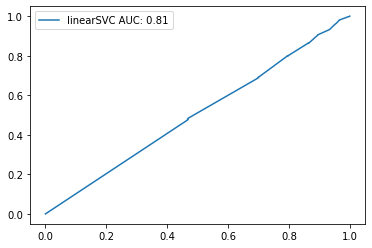

Score on train: 0.9633023990142092
Score on test: 0.9439759732008779


In [91]:
best_linear_SVC = LinearSVC(C=C_range[which_max])
best_linear_SVC.fit(X_remainder, y_remainder)

linearSVC_fprs_test, linearSVC_tprs_test, thresholds_test = roc_curve(y_test, y_pred)

linearSVC_auc_value = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(linearSVC_fprs_test, linearSVC_tprs_test, label=f"linearSVC AUC: {round(rf_auc_value,2)}")
plt.legend()
plt.show()

train_score = best_linear_SVC.score(X_remainder,y_remainder)
test_score = best_linear_SVC.score(X_test, y_test)

print(f'Score on train: {train_score}')
print(f'Score on test: {test_score}')

In [92]:
accuracy_sc.append(test_score)
modelling.append('Linear SVC')

In [93]:
from sklearn.metrics import confusion_matrix

y_pred = best_linear_SVC.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[ 179,  399],
       [  86, 7993]], dtype=int64)

In [94]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.68      0.31      0.42       578
           1       0.95      0.99      0.97      8079

    accuracy                           0.94      8657
   macro avg       0.81      0.65      0.70      8657
weighted avg       0.93      0.94      0.93      8657



In [95]:
prec.append(precision_score(y_test, y_pred))
rcall.append(recall_score(y_test, y_pred))
f1_sc.append(f1_score(y_test, y_pred))

<br>
<br>

### Kernel SVM

In [96]:
X_train, X_validation, X_test, X_remainder, y_train, y_validation, y_test, y_remainder, bagofwords = train_test_split(X,y)

In [97]:
from sklearn.svm import SVC
my_kernel_SVM = SVC(kernel='sigmoid', max_iter=100000)

my_kernel_SVM.fit(X_remainder,y_remainder)

SVC(kernel='sigmoid', max_iter=100000)

In [98]:
train_score = my_kernel_SVM.score(X_remainder,y_remainder)
test_score = my_kernel_SVM.score(X_test, y_test)

print(f'Score on train: {train_score}')
print(f'Score on test: {test_score}')

Score on train: 0.9076976394932419
Score on test: 0.9040083169689269


In [99]:
accuracy_sc.append(test_score)
modelling.append('Kernel SVM')

In [100]:
from sklearn.metrics import confusion_matrix

y_pred = my_kernel_SVM.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[  87,  491],
       [ 340, 7739]], dtype=int64)

In [101]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.20      0.15      0.17       578
           1       0.94      0.96      0.95      8079

    accuracy                           0.90      8657
   macro avg       0.57      0.55      0.56      8657
weighted avg       0.89      0.90      0.90      8657



In [102]:
prec.append(precision_score(y_test, y_pred))
rcall.append(recall_score(y_test, y_pred))
f1_sc.append(f1_score(y_test, y_pred))

<br>

### Naive Bayes

In [103]:
X_train, X_validation, X_test, X_remainder, y_train, y_validation, y_test, y_remainder, bagofwords = train_test_split(X,y)

In [104]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Instatiate our model
nbmodel = BernoulliNB()
# Fit our model
nbmodel.fit(X_remainder, y_remainder)

nbmodel.predict(X_test)

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [105]:
test_score = nbmodel.score(X_test, y_test)
print(f'Score on test: {test_score}')

Score on test: 0.9088598821762736


In [106]:
accuracy_sc.append(test_score)
modelling.append('Naive Bayes')

In [107]:
from sklearn.metrics import confusion_matrix

y_pred = nbmodel.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[ 156,  422],
       [ 367, 7712]], dtype=int64)

In [108]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.30      0.27      0.28       578
           1       0.95      0.95      0.95      8079

    accuracy                           0.91      8657
   macro avg       0.62      0.61      0.62      8657
weighted avg       0.90      0.91      0.91      8657



In [109]:
prec.append(precision_score(y_test, y_pred))
rcall.append(recall_score(y_test, y_pred))
f1_sc.append(f1_score(y_test, y_pred))

<br>

### Word embedding with Neural Network

In [110]:
from sklearn.model_selection import train_test_split

# Taking a chuck for our 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [111]:
reviews_df['stemmed_tokens'] = [my_tokenizer(sentence) for sentence in reviews_df['reviews.text'].values]
reviews_df['stemmed_tokens'].head(10)

0    [product, far, not, disappoint, children, love...
1    [great, beginn, experienc, person, bought, gif...
2    [inexpens, tablet, use, learn, step, nabi, thr...
3    [ive, fire, hd, 8, two, week, love, tablet, gr...
4    [bought, grand, daughter, come, visit, set, us...
5    [amazon, fire, 8, inch, tablet, perfect, size,...
6    [great, eread, go, nice, light, weight, price,...
7    [gave, christma, gift, inlaw, husband, uncl, l...
8    [great, devic, read, book, like, link, borrow,...
9                    [love, order, book, read, reader]
Name: stemmed_tokens, dtype: object

In [112]:
from tensorflow.keras.preprocessing.text import Tokenizer

# code taken from my educator, Doug Matthews
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) # equivalent to .fit(X_train)
sequences = tokenizer.texts_to_sequences(X_train) # equivalent to .transform(X_train)

In [113]:
# code taken from https://www.tensorflow.org/tutorials/text/word_embeddings

import tensorflow as tf
train_data = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [114]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# standardize the lengths of the reviews.
# code taken from my educator, Doug Matthews
X_train = pad_sequences(sequences, padding='post', truncating='post')
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), padding='post', truncating='post')

In [115]:
X_test.shape

(8657, 1822)

In [116]:
y_test.shape

(8657,)

In [117]:
X_train

array([[  23, 1087,    7, ...,    0,    0,    0],
       [  28,  356,   13, ...,    0,    0,    0],
       [   1,   35,  717, ...,    0,    0,    0],
       ...,
       [  10,  370,   67, ...,    0,    0,    0],
       [  24,    7,  637, ...,    0,    0,    0],
       [  32,    9,    6, ...,    0,    0,    0]])

In [118]:
X_test

array([[2012,  154,   47, ...,    0,    0,    0],
       [  51,   11,   44, ...,    0,    0,    0],
       [   9,    8,   52, ...,    0,    0,    0],
       ...,
       [  90,    5,    6, ...,    0,    0,    0],
       [   9,    8,   76, ...,    0,    0,    0],
       [  44,   22,    5, ...,    0,    0,    0]])

In [119]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [120]:
from gensim.models import Word2Vec

# word2vec only used for counting vocabs size
stemmed_tokens = pd.Series(reviews_df['stemmed_tokens']).values
w2v_model = Word2Vec(stemmed_tokens, min_count = 1, size = 1000, workers = 3, window = 3, sg = 1)
words = list(w2v_model.wv.vocab)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 14094


In [121]:
embedding_dim=16
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Embedding(len(words), embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          225504    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 225,793
Trainable params: 225,793
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
812/812 [==============================] - 6s 8ms/step - loss: 0.2844 - accuracy: 0.8693 - val_loss: 0.2437 - val_accuracy: 0.9332
Epoch 2/100
812/812 [==============================] - 6s 7ms/step - loss: 0.2430 - accuracy: 0.9332 - val_loss: 0.2428 - val_accuracy: 0.9331
Epoch 3/100
812/812 [==============================] - 6s 7ms/step - loss: 0.2417 - accuracy: 0.9332 - val_loss: 0.2414 - val_accuracy: 0.9331
Epoch 4/100
812/812 [==============================] - 6s 7ms/step - loss: 0.2403 - accuracy: 0.9332 - val_loss: 0.2398 - val_accuracy: 0.9331
Epoch 5/100
812/812 [==============================] - 6s 7ms/step - loss: 0.2382 - accuracy: 0.9332 - val_loss: 0.2382 - val_accuracy: 0.9331
Epoch 6/100
812/812 [==============================] - 6s 7ms/step - loss: 0.2355 - accuracy: 0.9330 - val_loss: 0.2353 - val_accuracy: 0.9329
Epoch 7/100
812/812 [==============================] - 6s 7ms/step - loss: 0.2319 - accuracy: 0.9330 - val_loss: 0.2325 - val_accuracy: 0.9325

Epoch 58/100
812/812 [==============================] - 6s 7ms/step - loss: 0.0991 - accuracy: 0.9640 - val_loss: 0.1927 - val_accuracy: 0.9406
Epoch 59/100
812/812 [==============================] - 6s 7ms/step - loss: 0.0980 - accuracy: 0.9656 - val_loss: 0.2003 - val_accuracy: 0.9196
Epoch 60/100
812/812 [==============================] - 6s 7ms/step - loss: 0.0972 - accuracy: 0.9654 - val_loss: 0.1939 - val_accuracy: 0.9398
Epoch 61/100
812/812 [==============================] - 6s 7ms/step - loss: 0.0960 - accuracy: 0.9651 - val_loss: 0.1925 - val_accuracy: 0.9315
Epoch 62/100
812/812 [==============================] - 6s 7ms/step - loss: 0.0945 - accuracy: 0.9669 - val_loss: 0.1961 - val_accuracy: 0.9385
Epoch 63/100
812/812 [==============================] - 6s 7ms/step - loss: 0.0927 - accuracy: 0.9671 - val_loss: 0.1953 - val_accuracy: 0.9338
Epoch 64/100
812/812 [==============================] - 6s 7ms/step - loss: 0.0931 - accuracy: 0.9662 - val_loss: 0.1993 - val_accuracy:

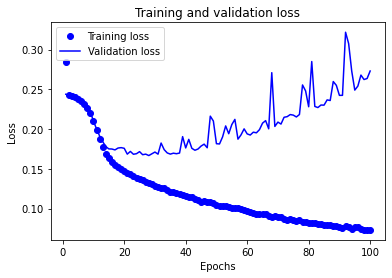

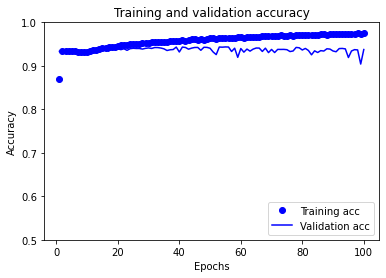

In [123]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

Looking at this result, we can see that the training loss continues to decrease after each epoch. However, the validation loss actually starts to increase. After a certain number of epochs our model begins to overfit to our training data. We can use this plot to determine the number of epochs we want to run our model for. In this example, we would probably stop training our model after about 10 epochs. <br> <br>
In practice, many neural networks will take so long to train that we will never reach this threshold. In these cases, we will train for as long as feasibly possible or until we get results that are satisfactory for our application.

In [124]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=2)
print (score[1])

68/68 - 0s - loss: 0.2730 - accuracy: 0.9375
0.9375072121620178


In [125]:

from sklearn.metrics import confusion_matrix

# y_pred = model.predict(X_test)
y_pred = model.predict_classes(X_test,batch_size=128)

confusion_matrix(y_test, y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[ 163,  415],
       [ 126, 7953]], dtype=int64)

In [126]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.56      0.28      0.38       578
           1       0.95      0.98      0.97      8079

    accuracy                           0.94      8657
   macro avg       0.76      0.63      0.67      8657
weighted avg       0.92      0.94      0.93      8657



In [127]:
accuracy_sc.append(score[1])
modelling.append('Tensorflow NN')

In [128]:
prec.append(precision_score(y_test, y_pred))
rcall.append(recall_score(y_test, y_pred))
f1_sc.append(f1_score(y_test, y_pred))

<br><br>

### Results

In [129]:
results_df=pd.DataFrame()
results_df['Model']=modelling
results_df['Accuracy Score']=accuracy_sc
results_df['Precision']=prec
results_df['Recall']=rcall
results_df['F1 Score']=f1_sc
results_df

,Model,Accuracy Score,Precision,Recall,F1 Score
0,Logistic Regression,0.938893,0.944850,0.992450,0.968065
1,K Nearest Neighbor,0.932656,0.933897,0.998515,0.965125
2,Decision Tree,0.935659,0.938652,0.996163,0.966553
3,Random Forest,0.936237,0.938075,0.997524,0.966887
4,Linear SVC,0.943976,0.952455,0.989355,0.970554
5,Kernel SVM,0.904008,0.940340,0.957916,0.949047
6,Naive Bayes,0.908860,0.948119,0.954574,0.951335
7,Tensorflow NN,0.937507,0.950406,0.984404,0.967106


In [130]:
# results_df.to_excel("results.xlsx") 

Looks like all the models performed very well (>90%), and we will use the Linear Support Vector Machine Classifier since it has the highest accuracy level at 94.39%.